In [70]:
import os
import random
import matplotlib.pyplot as plt

In [71]:
def load_data(filename: str):
    file = open(filename, 'r')
    text = file.read()
    lines = text.split('\n')
    times = []
    for line in lines:
        if line:
            timestr = line.split('\t')[1]
            minute, second = timestr.split('m')
            minute = int(minute)
            second = float(second[:-1])
            times.append(60 * minute + second)
    file.close()
    return times

In [72]:
def get_random_rgb_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

In [99]:
def plot_times(num_qubits, ax, filename, label):
    try:
        data = load_data(filename)
        color = get_random_rgb_color()
        ax.semilogy(num_qubits[:len(data)], data, label=label, color=color)
        ax.scatter(num_qubits[:len(data)], data, color=color)
    except:
        pass

In [100]:
def plot_test(num_qubits, test_dir, test_name):
    fig, ax = plt.subplots()

    plot_times(num_qubits, ax, os.path.join(test_dir, 'haskell.txt'), 'Haskell')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'qiskit_normal.txt'), 'Qiskit (normal)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'cirq_normal.txt'), 'Cirq (normal)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'cirq_queued.txt'), 'Cirq (queued)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'qiskit_queued.txt'), 'Qiskit (queued)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'qiskit_direct.txt'), 'Qiskit (direct)')
    plot_times(num_qubits, ax, os.path.join(test_dir, 'cirq_direct.txt'), 'Cirq (direct)')
    
    ax.set_title(test_name)
    ax.legend()
    ax.set_xlabel('Qubits')
    ax.set_ylabel('Simulation time (seconds)')
    
    plt.show()

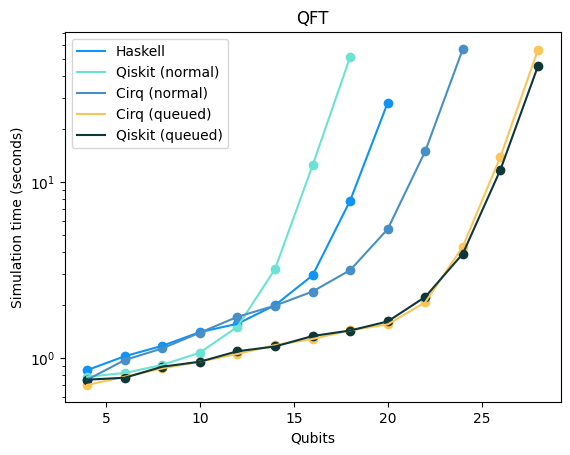

In [141]:
plot_test(list(range(4, 30, 2)), 'results/qft', 'QFT')

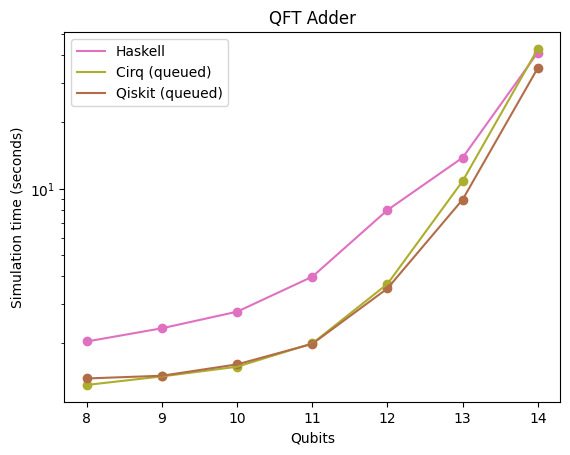

In [143]:
plot_test(list(range(8, 15)), 'results/qftadder', 'QFT Adder')

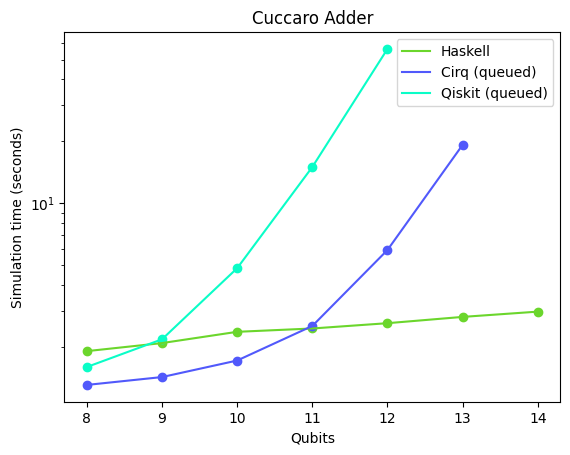

In [144]:
plot_test(list(range(8, 15)), 'results/cuccaroadder', 'Cuccaro Adder')

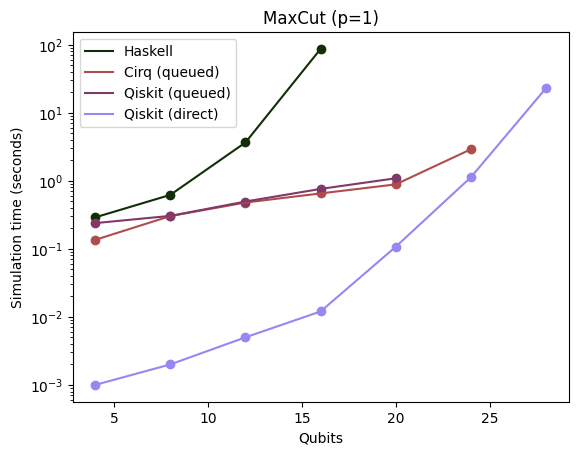

In [145]:
plot_test(list(range(4, 32, 4)), 'results/maxcut/p1', 'MaxCut (p=1)')

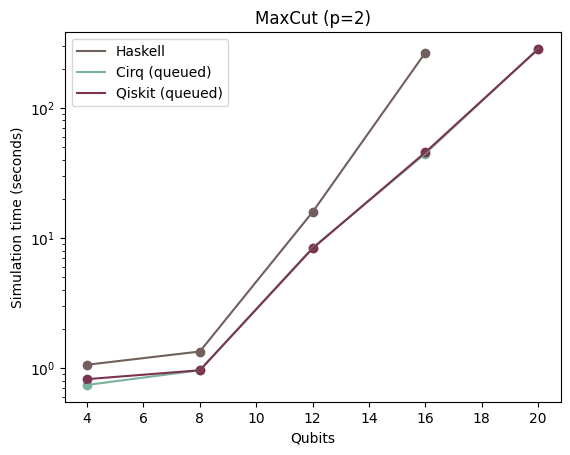

In [137]:
plot_test(list(range(4, 24, 4)), 'results/maxcut/p2', 'MaxCut (p=2)')

In [106]:
from time import time
from qiskit import qasm3
from qiskit_aer import AerSimulator

In [68]:
# running direct openqasm simulation
sim = AerSimulator()
qc = qasm3.load("tests/maxcut/p1/n28.qasm")

start_t = time()
result = sim.run(qc, shots=1).result()
sim_t = time() - start_t
print('Simulation time=%.3fs' % sim_t)
print(result.get_counts())

Simulation time=22.907s
{'0000000000000010000000100011': 1}
